# 🛸 Day 3 Practice: Hello Entanglement 2

**Author:** Minh Thang
**Objective:** Create and verify Quantum Entanglement - the "spookiest" phenomenon in quantum mechanics.

---

## 🧠 Theory Recap
To create a link between 2 Qubits (Alice & Bob), we use the ultimate combo: **Hadamard + CNOT**.

1.  **Initial State:** $|00\rangle$
2.  **Step 1 (Hadamard on $q_0$):** Put Alice into a superposition state.
    $$H|0\rangle \otimes |0\rangle = \frac{|0\rangle + |1\rangle}{\sqrt{2}} \otimes |0\rangle$$
3.  **Step 2 (CNOT $0 \to 1$):** Entangle Bob with Alice's state.
    * If Alice is 0 $\to$ Bob stays the same (0).
    * If Alice is 1 $\to$ Bob flips (1).

**💎 Final Result (Bell State):**
$$|\Phi^+\rangle = \frac{|00\rangle + |11\rangle}{\sqrt{2}}$$
*(Probability of measuring 00 is 50%, 11 is 50%. They are never mismatched!)*

---
## 🛠 Implementation Steps
1.  **Initialization:** Create a 2-Qubit Quantum Circuit.
2.  **Create Entanglement:** Apply H gate and CX gate.
3.  **Mathematical Check:** Use `Statevector` to view the state vector formula.
4.  **Experimental Check:** Measure 1024 times and plot the histogram.

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

Mạch khởi tạo:


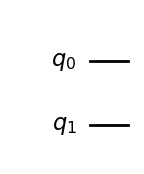

In [2]:
# 2. Create 2 Qubit Circuits
qc = QuantumCircuit(2)

# Check null
print("Mạch khởi tạo:")
qc.draw('mpl')

Entanglement creation circuit:


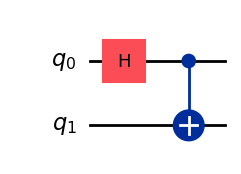

In [3]:
# 1. Create a superposition state for Qubit 0 (Alice)
# Transform |0> into (|0> + |1>) / sqrt(2)
qc.h(0)

# 2. "Entangle" Qubit 0 into Qubit 1 (Bob)

# If Alice is 1, Bob will be inverted. Since Alice is in a state of limbo, Bob is also in a state of limbo.
qc.cx(0, 1)

# Redraw the circuit to ensure the diagram is correct
print("Entanglement creation circuit:")
qc.draw('mpl')

In [4]:
# Get the current state vector of the circuit
state = Statevector.from_instruction(qc)

# Print in a nice format (LaTeX)
print("Resulting state vector:")
display(state.draw('latex'))

# Expected result: You will see (1/sqrt(2))|00> + (1/sqrt(2))|11>
# There is no |01> or |10>!

Resulting state vector:


<IPython.core.display.Latex object>

Measured result: {'00': 527, '11': 497}


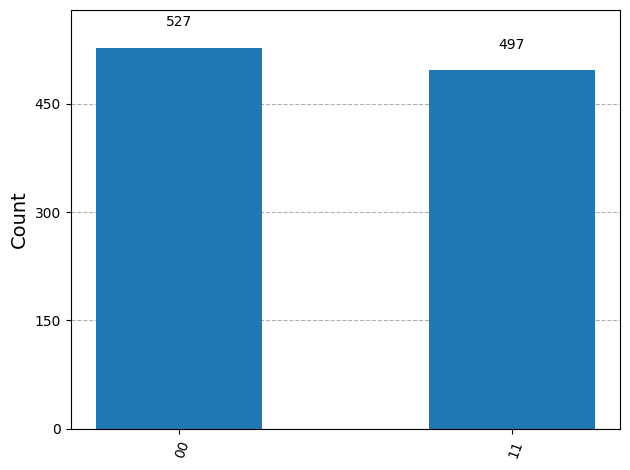

In [5]:
# Recreate a new circuit with measurements
meas_qc = QuantumCircuit(2)
meas_qc.h(0)
meas_qc.cx(0, 1)
meas_qc.measure_all() # Add a measurement step

# Run the simulation
from qiskit import transpile
from qiskit_aer import AerSimulator

backend = AerSimulator()
t_qc = transpile(meas_qc, backend)
result = backend.run(t_qc, shots=1024).result() # Shoot 1024 times
counts = result.get_counts()

# Plot the graph
print("Measured result:", counts)
plot_histogram(counts)